# Python Project: Pizza Sales Analysis

### Objective:
<h5>The goal of this project is to analyze a pizza sales database to uncover key business insights that can help improve operations, 
understand customer preferences, and guide decision-making.</h5>

#### Problem Statement:
A pizza delivery company wants to optimize its operations and increase profitability by leveraging historical order data. 
The company has provided datasets containing order details, pizza information, and category classifications. 
Your task is to perform a thorough Python analysis to answer key business questions, ranging from basic sales metrics to advanced revenue insights.

##### Import libraries 

In [1]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading datasets 

In [2]:
order_details = pd.read_csv('order_details.csv')
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [36]:
order_details.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

In [3]:
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [37]:
orders.isnull().sum()

order_id    0
date        0
time        0
hour        0
dtype: int64

In [4]:
pizza_types = pd.read_csv('pizza_types.csv', encoding='cp1252')
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [39]:
pizza_types.isnull().sum()

pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64

In [40]:
pizzas = pd.read_csv('pizzas.csv')
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [41]:
pizzas.isnull().sum()

pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64

All above datasets are cleaned 

## BASIC QUESTIONS 

#### Q1. Retrieve the total number of orders placed.

In [6]:
total_orders = orders['order_id'].nunique()
print('Total Number of orders placed : ', total_orders)

Total Number of orders placed :  21350


#### Q2. Calculate the total revenue generated from pizza sales.

In [7]:
# Revenue = Price x Quantity.

# Step 1: Merge the two DataFrames on 'pizza_id'
merged_df = order_details.merge(pizzas, on='pizza_id')

# Step 2: Calculate revenue per row
merged_df['revenue'] = merged_df['quantity'] * merged_df['price']

# Step 3: Calculate total revenue
total_revenue = merged_df['revenue'].sum()

print("Total Revenue from Pizza Sales:", round(total_revenue, 2))

Total Revenue from Pizza Sales: 817860.05


#### Q3. Identify the highest-priced pizza.

In [43]:
# step 1 : Clean price col
pizzas['price'] = pizzas['price'].replace('[\$,]').astype(float)

# step 2 : merge pizzas and pizza_types based on pizza_type_id col
merged_high_price_pizza = pizzas.merge(pizza_types, on = 'pizza_type_id' )

# step 3 : sort by price desc as we required max price
high_price_pizza = merged_high_price_pizza.sort_values( by = 'price' , ascending = False).head(1)

# print name of pizza with price
print("Highest Priced Pizza:")
print(high_price_pizza[['name', 'price']])

Highest Priced Pizza:
               name  price
43  The Greek Pizza  35.95


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\hp\AppData\Local\Temp\ipykernel_7700\1564467046.py:2: SyntaxWarning: invalid escape sequence '\$'
  pizzas['price'] = pizzas['price'].replace('[\$,]').astype(float)
C:\Users\hp\AppData\Local\Temp\ipykernel_7700\1564467046.py:2: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  pizzas['price'] = pizzas['price'].replace('[\$,]').astype(float)


#### Q4. Identify the most common pizza size ordered.

In [9]:
# step 1 : merge two df pizzas and order details 
merged_most_ordered_size = pizzas.merge(order_details,on = 'pizza_id')

# step 2 : sort by price desc as we required max price
most_ordered_size = (merged_most_ordered_size.groupby('size').agg(order_count=('order_details_id', 'count')).reset_index().
                     sort_values(by = 'order_count', ascending = False).head(1))

# Print final result
print('The Most ordered pizza size is : \n', most_ordered_size)

The Most ordered pizza size is : 
   size  order_count
0    L        18526


In [10]:
most_ordered_size

,size,order_count
0,L,18526


#### Q5. List the top 5 most ordered pizza types along with their quantities.

In [11]:
# Step 1: Merge all three DataFrames
merged_df = pizza_types.merge(pizzas, on='pizza_type_id').merge(order_details, on='pizza_id')

# Step 2: Group by pizza name and sum the quantity
top_5_pizzas = (
    merged_df.groupby('name')
    .agg(sum_of_pizza_quantity=('quantity', 'sum'))
    .reset_index()
    .sort_values(by='sum_of_pizza_quantity', ascending=False)
    .head(5)
)

# Step 3: Display result
print('The top 5 most ordered pizza types along with their quantities : \n', top_5_pizzas)


The top 5 most ordered pizza types along with their quantities : 
                           name  sum_of_pizza_quantity
7     The Classic Deluxe Pizza                   2453
0   The Barbecue Chicken Pizza                   2432
12          The Hawaiian Pizza                   2422
20         The Pepperoni Pizza                   2418
30      The Thai Chicken Pizza                   2371


## Intermediate Questions

#### Q1. Join the necessary tables to find the total quantity of each pizza category ordered.

In [12]:
# Step 1: Merge all three DataFrames
merged_df_category = pizza_types.merge(pizzas, on='pizza_type_id').merge(order_details, on='pizza_id')

# Step 2: Group by pizza name and sum the quantity
pizza_category_ordered = (
    merged_df.groupby('category')
    .agg(total_quantity=('quantity', 'sum'))
    .reset_index()
    .sort_values(by='total_quantity', ascending=False)
)

# Step 3: Display result
print('The total quantity of each pizza category ordered : \n', pizza_category_ordered)


The total quantity of each pizza category ordered : 
   category  total_quantity
1  Classic           14888
2  Supreme           11987
3   Veggie           11649
0  Chicken           11050


#### Q2. Determine the distribution of orders by hour of the day.

In [13]:
# Find out hours 
orders['hour'] = pd.to_datetime(orders['time'], format = '%H:%M:%S')
orders['hour'] = orders['hour'].dt.hour

In [14]:
orders['hour'].head()

0    11
1    11
2    12
3    12
4    12
Name: hour, dtype: int32

In [15]:
orders_by_hour_of_the_day = orders.groupby('hour')['order_id'].count().reset_index(name='OrderCount')

In [16]:
orders_by_hour_of_the_day.sort_values('hour', ascending = True)

,hour,OrderCount
0,9,1
1,10,8
2,11,1231
3,12,2520
4,13,2455
5,14,1472
6,15,1468
7,16,1920
8,17,2336
9,18,2399


In [44]:
# Print first 5 records 
orders_by_hour_of_the_day.sort_values('hour', ascending = True).head()

,hour,OrderCount
0,9,1
1,10,8
2,11,1231
3,12,2520
4,13,2455


#### Q3. Find the category-wise distribution of pizzas.

In [17]:
# Finding out pizzas by their category
pizza_types_category_wise_distribution = pizza_types.groupby('category')['name'].count().reset_index()
pizza_types_category_wise_distribution

,category,name
0,Chicken,6
1,Classic,8
2,Supreme,9
3,Veggie,9


#### Q4.Group the orders by date and calculate the average number of pizzas ordered per day.

Average pizzas sold per day: 138.0


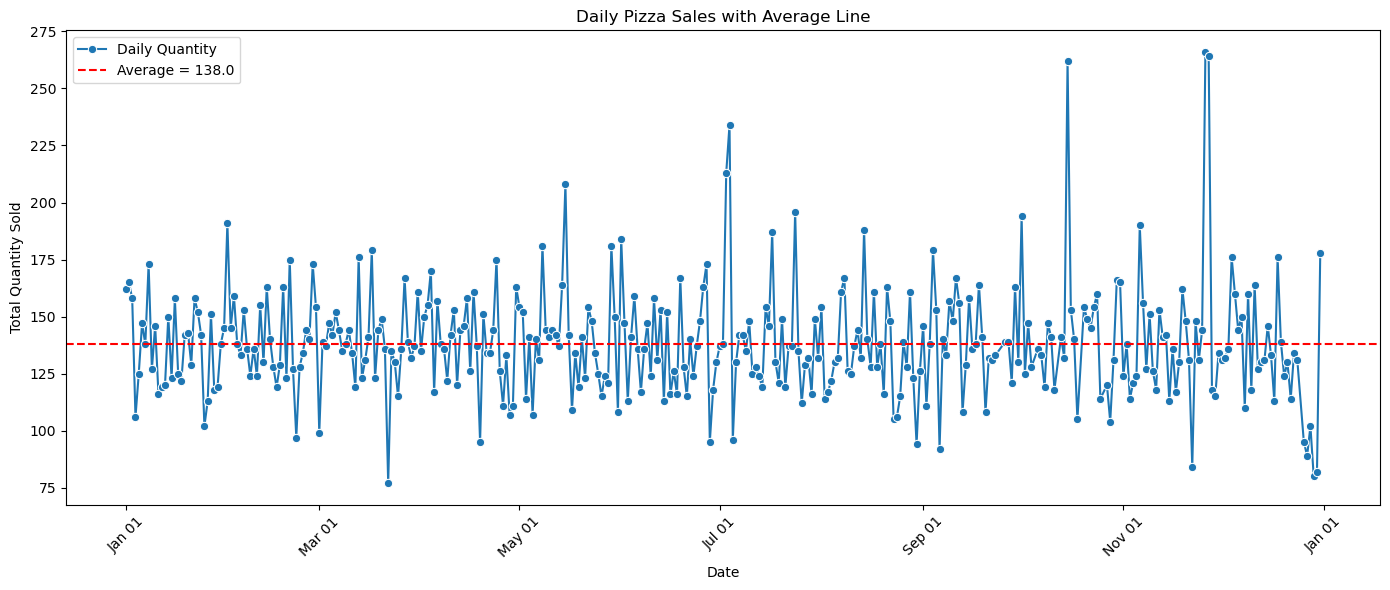

In [18]:
# Merge orders and order_details on order_id
merged_df = pd.merge(orders, order_details, on='order_id')

# Group by date and sum quantity
daily_quantity = merged_df.groupby('date')['quantity'].sum().reset_index()

# Ensure 'date' is datetime
daily_quantity['date'] = pd.to_datetime(daily_quantity['date'])

# Calculate the average quantity and round it
avg_pizza = round(daily_quantity['quantity'].mean(), 0)
print("Average pizzas sold per day:", avg_pizza)

# Plotting the graph
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_quantity, x='date', y='quantity', marker='o', label='Daily Quantity')
plt.axhline(avg_pizza, color='red', linestyle='--', label=f'Average = {avg_pizza}')

# Format x-axis for better readability
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)

# Add titles and labels
plt.title('Daily Pizza Sales with Average Line')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.tight_layout()
plt.show()

####  Q5. Determine the top 3 most ordered pizza types based on revenue.

In [19]:
# Step 1: Merge all three DataFrames
merged_df_based_on_revenue = pizza_types.merge(pizzas, on='pizza_type_id').merge(order_details, on='pizza_id')

In [20]:
# Step 2 : Create a new col called revenue
merged_df_based_on_revenue['revenue'] = merged_df_based_on_revenue['price'] * merged_df_based_on_revenue['quantity']

In [21]:
merged_df_based_on_revenue['revenue'].head()

0    12.75
1    12.75
2    12.75
3    12.75
4    12.75
Name: revenue, dtype: float64

In [22]:
merged_df_based_on_revenue.head()

,pizza_type_id,name,category,ingredients,pizza_id,size,price,order_details_id,order_id,quantity,revenue
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,11,6,1,12.75
1,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,239,102,1,12.75
2,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,294,124,1,12.75
3,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,458,194,1,12.75
4,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,489,208,1,12.75


In [23]:
pizza_types_based_on_revenue = merged_df_based_on_revenue.groupby('name')['revenue'].sum()
                                                          .reset_index()
                                                        .sort_values(by='revenue', ascending = False).head(3)

In [24]:
pizza_types_based_on_revenue

,name,revenue
30,The Thai Chicken Pizza,43434.25
0,The Barbecue Chicken Pizza,42768.00
4,The California Chicken Pizza,41409.50


In [25]:
# Step 4: Display result
print('The top 3 most ordered pizza types based on revenue:\n', pizza_types_based_on_revenue)

The top 3 most ordered pizza types based on revenue:
                             name   revenue
30        The Thai Chicken Pizza  43434.25
0     The Barbecue Chicken Pizza  42768.00
4   The California Chicken Pizza  41409.50


## Advance Questins

#### Q1. Calculate the percentage contribution of each pizza type by total revenue.

In [26]:
# Step 1: Merge all three DataFrames
merged_df_contribution = pizza_types.merge(pizzas, on='pizza_type_id').merge(order_details, on='pizza_id')

In [27]:
# Step 2 : create revenue col 
merged_df_contribution['revenue'] = merged_df_contribution['price'] * merged_df_contribution['quantity']

In [28]:
# step 3 : Group by category and sum revenue
total_revenue = merged_df_contribution.groupby('category', as_index = False)['revenue'].sum().sort_values(by='revenue', ascending = False)
total_revenue

,category,revenue
1,Classic,220053.10
2,Supreme,208197.00
0,Chicken,195919.50
3,Veggie,193690.45


In [29]:
total_revenue

,category,revenue
1,Classic,220053.10
2,Supreme,208197.00
0,Chicken,195919.50
3,Veggie,193690.45


In [30]:
# Step 4: Calculate Percentage Revenue
total_percentage_contribution  = total_revenue['revenue'].sum()

In [31]:
total_percentage_contribution

817860.05

In [32]:
total_revenue['percentage revenue'] = round(total_revenue['revenue'] * 100 / total_percentage_contribution , 2)

In [33]:
# Step 5 : Print result 
pizza_countribution_by_total_revenue = total_revenue[['category','percentage revenue']]

In [34]:
print('The percentage contribution of each pizza type by total revenue are below: \n', pizza_countribution_by_total_revenue)

The percentage contribution of each pizza type by total revenue are below: 
   category  percentage revenue
1  Classic               26.91
2  Supreme               25.46
0  Chicken               23.96
3   Veggie               23.68


#### Q2. Analyze the cumulative revenue generated over time.

In [45]:
# Step 1 :  Merge datasets 
cumulative_revenue_merged_df = order_details.merge(pizzas, on = 'pizza_id').merge(orders, on = 'order_id')

In [48]:
cumulative_revenue_merged_df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,date,time,hour
0,1,1,hawaiian_m,1,hawaiian,M,13.25,2015-01-01,11:38:36,11
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,2015-01-01,11:57:40,11
2,3,2,five_cheese_l,1,five_cheese,L,18.50,2015-01-01,11:57:40,11
3,4,2,ital_supr_l,1,ital_supr,L,20.75,2015-01-01,11:57:40,11
4,5,2,mexicana_m,1,mexicana,M,16.00,2015-01-01,11:57:40,11


In [47]:
cumulative_revenue_merged_df.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
date                0
time                0
hour                0
dtype: int64

In [50]:
# Step 2 : create revenue column
cumulative_revenue_merged_df['revenue'] = cumulative_revenue_merged_df['price'] * cumulative_revenue_merged_df['quantity']

In [51]:
cumulative_revenue_merged_df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,date,time,hour,revenue
0,1,1,hawaiian_m,1,hawaiian,M,13.25,2015-01-01,11:38:36,11,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,2015-01-01,11:57:40,11,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50,2015-01-01,11:57:40,11,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75,2015-01-01,11:57:40,11,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00,2015-01-01,11:57:40,11,16.00


In [69]:
# Step 3 : Group by date to get daily revenue
daily_total =  cumulative_revenue_merged_df.groupby('date', as_index=False)['revenue'].sum()
daily_total.head()


,date,revenue
0,2015-01-01,2713.85
1,2015-01-02,2731.90
2,2015-01-03,2662.40
3,2015-01-04,1755.45
4,2015-01-05,2065.95


In [70]:
# Step 4 : Calculate cumulative revenue from above
daily_total['cumulative_revenue'] = daily_total['revenue'].cumsum()

In [72]:
# Step 5 : display result
print(daily_total)

           date  revenue  cumulative_revenue
0    2015-01-01  2713.85             2713.85
1    2015-01-02  2731.90             5445.75
2    2015-01-03  2662.40             8108.15
3    2015-01-04  1755.45             9863.60
4    2015-01-05  2065.95            11929.55
..          ...      ...                 ...
353  2015-12-27  1419.00           810615.80
354  2015-12-28  1637.20           812253.00
355  2015-12-29  1353.25           813606.25
356  2015-12-30  1337.80           814944.05
357  2015-12-31  2916.00           817860.05

[358 rows x 3 columns]


#### Q3. Determine the top 3 most ordered pizza types based on revenue for each pizza category.

In [75]:
# Step 1: Merge all three DataFrames
merged_df_top_3 = pizza_types.merge(pizzas, on='pizza_type_id').merge(order_details, on='pizza_id')

In [77]:
# Step 2 : create revenue col 
merged_df_top_3['revenue'] = merged_df_top_3['price'] * merged_df_top_3['quantity']

In [78]:
# Step 3 : Group by date to get daily revenue
most_ordered_pizza  =  merged_df_top_3.groupby(['category','name'], as_index=False)['revenue'].sum()
most_ordered_pizza.head()


,category,name,revenue
0,Chicken,The Barbecue Chicken Pizza,42768.00
1,Chicken,The California Chicken Pizza,41409.50
2,Chicken,The Chicken Alfredo Pizza,16900.25
3,Chicken,The Chicken Pesto Pizza,16701.75
4,Chicken,The Southwest Chicken Pizza,34705.75


In [79]:
# Step 4: Rank pizzas by revenue within each category
most_ordered_pizza['rank'] = most_ordered_pizza.groupby('category')['revenue'] \
                               .rank(method='dense', ascending=False)

In [81]:
most_ordered_pizza.head()

,category,name,revenue,rank
0,Chicken,The Barbecue Chicken Pizza,42768.00,2.0
1,Chicken,The California Chicken Pizza,41409.50,3.0
2,Chicken,The Chicken Alfredo Pizza,16900.25,5.0
3,Chicken,The Chicken Pesto Pizza,16701.75,6.0
4,Chicken,The Southwest Chicken Pizza,34705.75,4.0


In [83]:
# Step 5: Filter top 3 per category
top_3_per_category = most_ordered_pizza[most_ordered_pizza['rank'] <= 3]
top_3_per_category

,category,name,revenue,rank
0,Chicken,The Barbecue Chicken Pizza,42768.00,2.0
1,Chicken,The California Chicken Pizza,41409.50,3.0
5,Chicken,The Thai Chicken Pizza,43434.25,1.0
7,Classic,The Classic Deluxe Pizza,38180.50,1.0
9,Classic,The Hawaiian Pizza,32273.25,2.0
12,Classic,The Pepperoni Pizza,30161.75,3.0
16,Supreme,The Italian Supreme Pizza,33476.75,2.0
19,Supreme,The Sicilian Pizza,30940.50,3.0
21,Supreme,The Spicy Italian Pizza,34831.25,1.0
23,Veggie,The Five Cheese Pizza,26066.50,3.0


In [85]:
# Sort according to rank
top_3_per_category = top_3_per_category.sort_values(['category','rank'])
print(top_3_per_category)

   category                          name   revenue  rank
5   Chicken        The Thai Chicken Pizza  43434.25   1.0
0   Chicken    The Barbecue Chicken Pizza  42768.00   2.0
1   Chicken  The California Chicken Pizza  41409.50   3.0
7   Classic      The Classic Deluxe Pizza  38180.50   1.0
9   Classic            The Hawaiian Pizza  32273.25   2.0
12  Classic           The Pepperoni Pizza  30161.75   3.0
21  Supreme       The Spicy Italian Pizza  34831.25   1.0
16  Supreme     The Italian Supreme Pizza  33476.75   2.0
19  Supreme            The Sicilian Pizza  30940.50   3.0
24   Veggie         The Four Cheese Pizza  32265.70   1.0
28   Veggie            The Mexicana Pizza  26780.75   2.0
23   Veggie         The Five Cheese Pizza  26066.50   3.0


#### Summary:
Performed a comprehensive analysis of pizza sales data using Python and Pandas to uncover revenue trends, customer preferences, and category-wise performance. Used data transformation, aggregation, and ranking techniques to derive actionable business insights, and visualized results using Seaborn.

#### Key Highlights:

Merged multiple datasets (order_details, pizzas, pizza_types) to compute revenue per order.

Calculated daily revenue and cumulative revenue over time using groupby() and cumsum().

Identified the top 3 most revenue-generating pizza types within each category using groupby() and rank().

Created bar plots using Seaborn to visualize pizza performance across categories.

Used clean, modular Python code suitable for dashboards or business reporting.

#### Skills Used:
Python, Pandas, Data Wrangling, Data Aggregation, Window-like operations, Data Visualization

